# Highlighting the differences between HUNT3 and HUNT4

### Install and import required packages

In [1]:
%pip install --quiet -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from hunt_preprocessing import HuntLoader
import numpy as np

### Load and see a random brain-scan pair

We select a random candidate from the closed dataset

In [3]:
data_loader = HuntLoader()
hunt3, hunt4 = data_loader.load_random_pair(verbose=True)

h3 = data_loader.get_middle_slice(hunt3) # Can be replaced with whatever
h4 = data_loader.get_middle_slice(hunt4) # Can be replaced with whatever

Opening entry: 00374
00374 exists in both HUNT3 and HUNT4


We load both Brain Scan images (NIfTI files), get their fdata and display the center slice in the series

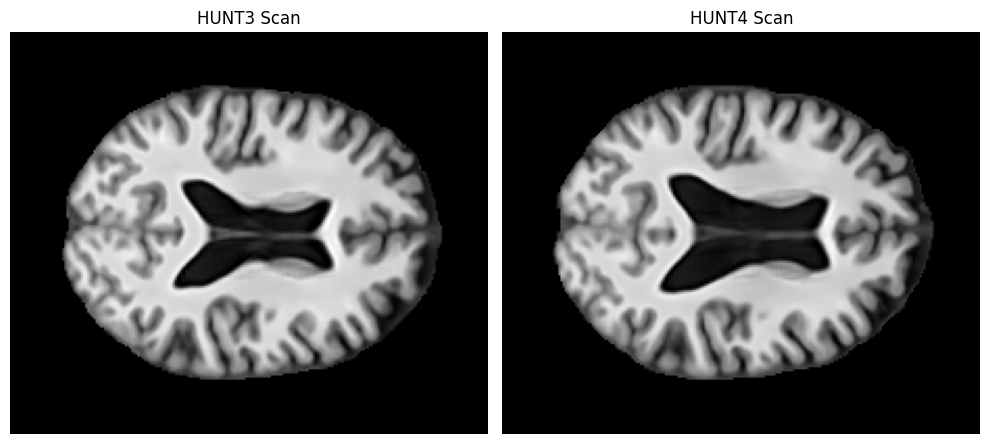

In [4]:
data_loader.display_slices(h3, h4)

## Differences

We now calculate the structural similarity of the two slices. This will show us how similar they are from 0-1, with 0 being totally different and 1 being the same image. As most of the picture is black and the brain doesn't change that much, we should expect a high number

In [5]:
print("Structural Similarity:", data_loader.structural_similarity(h3, h4))

Structural Similarity: 0.8785391770629304


### Highlighting the differences

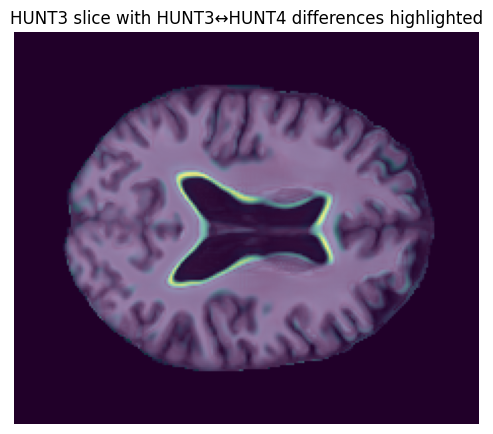

In [6]:
data_loader.display_slice_differences(h3, h4, hot=False)

### Displaying only the differences

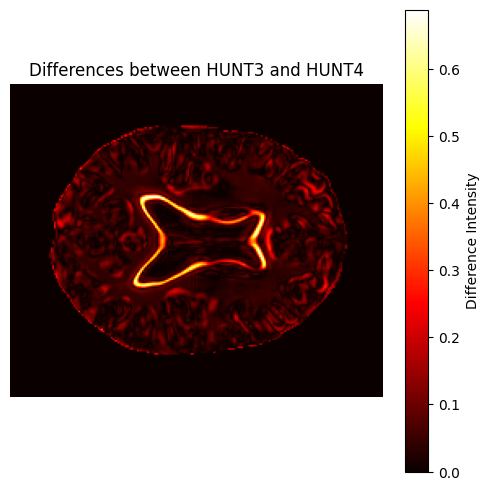

In [7]:
data_loader.display_slice_differences(h3, h4, hot=True)